# Summary

This notebook introduces the basic concepts in statistical genetics, including:

- genotype
- MAF, HWE
- LD, LD score
- kinship, GRM

# Intuition

Here we will put a cartoon --- use Figure 1 below plus coding into 012?

## Something from previous slides

![figure](https://www.frontiersin.org/files/Articles/127738/fbioe-03-00013-HTML-r1/image_m/fbioe-03-00013-g001.jpg)
> Figure 1. Common genetic variations. Variations at the (A) nucleotide level and (B) structural level. (C) Single nucleotide polymorphism A/T across a population.
> 
> Cardoso JGR, Andersen MR, Herrgård MJ and Sonnenschein N (2015) Analysis of genetic variation and potential applications in genome-scale metabolic modeling. Front. Bioeng. Biotechnol. 3:13. doi: 10.3389/fbioe.2015.00013

# Notations

**check with Gao**

- types of mutation and genetic variants --- synonymous vs non-synonymous, loss of function vs gain of function, .. (GT9)
- definition of locus, alleles, polymorphic (GT16)
- in general, for descriptions --- where to put?

Assume that the genotype matrix is denoted as a $N$ by $M$ matrix, $\mathbf{X}$, where $x_{ij} \in \{0,1,2\}$ represents the genotype of individual $i=1,...,N$ at variant $j=1,...,M$ (assuming single allelic).

\begin{equation*}
\mathbf{X} =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1M} \\
x_{21} & x_{22} & \cdots & x_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{NM}
\end{bmatrix}
\end{equation*}

- Rows ($i = 1, \dots, N$) correspond to individuals.
- Columns ($j = 1, \dots, M$) correspond to variants.
- Each entry $x_{ij}$ represents the genotype of individual $i$ for variant $j$, where:
  - $0$: Homozygous for the reference allele.
  - $1$: Heterozygous.
  - $2$: Homozygous for the alternative allele.
  


## MAF
The Minor Allele Frequency (MAF) for variant $j$ is defined as:

\begin{equation*}
\text{MAF}_j = \min\left(p_j, 1 - p_j\right),
\end{equation*}

where $p_j$ is the allele frequency of the reference allele (coded as 1), calculated as:

\begin{equation*}
p_j = \frac{1}{2N} \sum_{i=1}^{N} x_{ij}.
\end{equation*}



## Hardy-Weinberg Equilibrium (HWE)

Hardy-Weinberg Equilibrium (HWE) is a principle in population genetics that describes the expected genotype frequencies in a population under certain assumptions, including random mating, no mutation, no migration, no selection, and infinite population size.

For a variant $j$, let $p_j$ represent the allele frequency of the reference allele (coded as 1), and let $q_j = 1 - p_j$ represent the allele frequency of the alternative allele. In HWE, the expected genotype frequencies for this variant are:

- **Homozygous reference** ($x_{ij} = 0$): $(q_j)^2$,
- **Heterozygous** ($x_{ij} = 1$): $2p_j q_j$,
- **Homozygous alternative** ($x_{ij} = 2$): $(p_j)^2$.

The sum of these frequencies satisfies:

\begin{equation*}
(p_j + q_j)^2 = p_j^2 + 2p_j q_j + q_j^2 = 1.
\end{equation*}


## Linkage Disequilibrium (LD)

Linkage Disequilibrium (LD) refers to the non-random association of alleles at two or more loci. In a population, if two variants (or loci) are in LD, their allele combinations occur more or less frequently than expected based on their individual allele frequencies. LD can be quantified using various metrics, such as the correlation coefficient $r^2$.

Given the genotype matrix $\mathbf{X}$, where each element $x_{ij} \in \{0, 1, 2\}$ represents the genotype of individual $i$ for variant $j$, the LD between two variants $j_1$ and $j_2$ is typically measured using the correlation between the alleles at these two loci across individuals.

### Covariance and Correlation

The covariance between two variants $j_1$ and $j_2$ is computed as:

\begin{equation*}
\text{cov}(x_{i j_1}, x_{i j_2}) = \frac{1}{N} \sum_{i=1}^{N} \left( x_{i j_1} - \bar{x}_{j_1} \right) \left( x_{i j_2} - \bar{x}_{j_2} \right),
\end{equation*}

where $\bar{x}_{j_1}$ and $\bar{x}_{j_2}$ are the mean genotypes for variants $j_1$ and $j_2$, respectively, calculated as:

\begin{equation*}
\bar{x}_{j_1} = \frac{1}{N} \sum_{i=1}^{N} x_{i j_1}, \quad \bar{x}_{j_2} = \frac{1}{N} \sum_{i=1}^{N} x_{i j_2}.
\end{equation*}

The correlation coefficient $r$ is then given by:

\begin{equation*}
r_{j_1, j_2} = \frac{\text{cov}(x_{i j_1}, x_{i j_2})}{\sqrt{\text{var}(x_{i j_1}) \cdot \text{var}(x_{i j_2})}},
\end{equation*}

where $\text{var}(x_{i j})$ is the variance of the genotype values for variant $j$, calculated as:

\begin{equation*}
\text{var}(x_{i j}) = \frac{1}{N} \sum_{i=1}^{N} \left( x_{i j} - \bar{x}_j \right)^2.
\end{equation*}

### LD Measure: $r$ and $r^2$

The LD matrix is generally composed of the correlation coefficients $r$ between pairs of variants. For a set of $M$ variants, the LD matrix is an $M \times M$ matrix where the element at position $(j_1, j_2)$ is the correlation coefficient $r_{j_1, j_2}$ between variants $j_1$ and $j_2$:

\begin{equation*}
\mathbf{r} =
\begin{bmatrix}
r_{1,1} & r_{1,2} & \cdots & r_{1,M} \\
r_{2,1} & r_{2,2} & \cdots & r_{2,M} \\
\vdots & \vdots & \ddots & \vdots \\
r_{M,1} & r_{M,2} & \cdots & r_{M,M}
\end{bmatrix}
\end{equation*}

The square of the correlation coefficient, $r^2$, is commonly used as the measure of LD:

\begin{equation*}
r^2_{j_1, j_2} = \left( \frac{\text{cov}(x_{i j_1}, x_{i j_2})}{\sqrt{\text{var}(x_{i j_1}) \cdot \text{var}(x_{i j_2})}} \right)^2.
\end{equation*}

Values of $r^2$ range from 0 (no LD) to 1 (complete LD), indicating the degree to which alleles at the two variants are inherited together.

### Interpretation of LD

- **Strong LD**: High values of $r^2$ (close to 1) suggest that the alleles at variants $j_1$ and $j_2$ are often inherited together, meaning they are closely linked.
- **Weak or no LD**: Low values of $r^2$ (close to 0) suggest that the alleles at variants $j_1$ and $j_2$ are inherited independently.

## LD Score

The **LD score** is a measure of the extent to which a given variant is in linkage disequilibrium (LD) with other variants across the genome. It is used to summarize the amount of genetic information (in terms of LD) that a variant shares with all other variants in a region of interest.

### Definition

The LD score for a variant $j$ is defined as the sum of the squared correlation coefficients $r^2$ between that variant and all other variants in the genome, typically within a specified genomic window or region. Mathematically, the LD score for variant $j$ is given by:

\begin{equation*}
\text{LD Score}_j = \sum_{k \neq j} r_{j,k}^2
\end{equation*}

where:

- $r_{j,k}$ is the correlation coefficient between variants $j$ and $k$,
- The sum is taken over all variants $k \neq j$ in the region of interest.

This score reflects how much a variant is correlated with other variants across the genome, providing insight into the local structure of LD around that variant.

### Purpose of LD Score

- **Genetic Association Studies**: LD scores are useful in genetic association studies to account for the correlations between variants when performing polygenic risk score (PRS) analysis or genome-wide association studies (GWAS).
- **Controlling for Confounding**: In association studies, high LD between variants can lead to confounding effects, where the signal from a variant may be shared with other nearby variants. By using LD scores, researchers can assess the relative contribution of each variant and better control for LD when interpreting results.
- **Estimating Heritability**: LD scores are used to estimate the heritability of complex traits by calculating how much of the genetic variation in a trait can be explained by LD between variants.

### Interpretation

- **High LD Score**: A variant with a high LD score indicates that it is in strong LD with many other variants in the genome, meaning it shares a substantial amount of genetic variation with neighboring variants.
- **Low LD Score**: A variant with a low LD score indicates that it is not strongly correlated with many other variants, implying that it may have a unique genetic contribution or be in a region with low LD.

In summary, the LD score is a way to quantify the genetic "information content" of a variant based on its correlations with surrounding variants, and it is used in the context of genetic studies to account for LD structure in the genome.


### Kinship and Genetic Relationship Matrix (GRM)

#### Kinship

Kinship refers to the genetic relatedness between individuals, quantifying the proportion of alleles shared between them. The kinship coefficient between two individuals is a measure of their genetic relatedness and is defined as the probability that a randomly chosen allele from one individual is identical by descent (IBD) to a randomly chosen allele from the other individual.

The kinship coefficient $\phi_{ij}$ between individuals $i$ and $j$ is given by:

\begin{equation*}
\phi_{ij} = \mathbb{P}(\text{alleles are IBD}) 
\end{equation*}

For example:

- **Self ($i = j$)**: The kinship coefficient between an individual and themselves is 1, as they share all their alleles.
- **Full Siblings**: The kinship coefficient between full siblings is typically 0.5, as they share approximately half of their alleles by descent.
- **Parent-Child**: The kinship coefficient between a parent and child is 0.5, as they share 50% of their alleles.

Kinship coefficients are essential in genetic studies to account for relatedness among individuals in pedigree-based analyses, and they are commonly used in mixed linear models to adjust for familial relatedness in association studies.

#### Genetic Relationship Matrix (GRM)

The **Genetic Relationship Matrix (GRM)** is a matrix that represents the genetic relatedness between all pairs of individuals in a study. The GRM is widely used in genetic studies, especially in the context of mixed linear models (MLMs) to account for the relatedness among individuals when performing association studies.

The GRM is often computed based on the genotypic data, where each entry $K_{ij}$ in the GRM represents the genetic relationship between individuals $i$ and $j$. One common method to calculate the GRM is by using the genotype matrix $\mathbf{X}$, where each element $x_{ij} \in \{0, 1, 2\}$ represents the genotype of individual $i$ at variant $j$. The GRM can be computed as:

\begin{equation*}
K_{ij} = \frac{1}{M} \sum_{m=1}^{M} \left( \frac{x_{im} - \bar{x}_i}{\sigma_i} \right) \left( \frac{x_{jm} - \bar{x}_j}{\sigma_j} \right)
\end{equation*}

where:

- $M$ is the total number of variants,
- $x_{im}$ and $x_{jm}$ are the genotypes of individuals $i$ and $j$ at variant $m$,
- $\bar{x}_i$ and $\bar{x}_j$ are the mean genotypes for individuals $i$ and $j$, respectively,
- $\sigma_i$ and $\sigma_j$ are the standard deviations of the genotypes for individuals $i$ and $j$, respectively.

Alternatively, the GRM can also be computed using allele frequencies in a more standardized form, but the above formula gives an example of how relatedness is captured based on individual genotypes.

The GRM captures the covariance of genetic effects between pairs of individuals. It is essential for accounting for population structure, familial relatedness, and cryptic relatedness in association studies.

#### Interpretation

- **Diagonal Elements of GRM**: The diagonal elements of the GRM represent the genetic relatedness of an individual with themselves. For individuals with no missing genotypic data, the diagonal elements will typically have a value close to 1.
- **Off-Diagonal Elements of GRM**: The off-diagonal elements represent the genetic relatedness between different individuals. The values range from 0 (unrelated) to 1 (identical by descent).
- **Kinship and GRM**: The kinship coefficient can be seen as a special case of the GRM. For example, in a relatedness study based on the genotypic matrix $\mathbf{X}$, the GRM entries will capture relatedness in terms of genetic sharing, while kinship coefficients directly express the expected genetic sharing between pairs of individuals.

In summary, kinship quantifies genetic relatedness between individuals, and the GRM extends this concept by providing a comprehensive matrix representation of genetic relationships among all individuals in a study. Both are essential in controlling for genetic structure and familial relatedness in genetic association studies.


# A case example

In [7]:
# Load necessary library
library(ggplot2)

# 1. Generate a Random Genotype Matrix (N x M)
set.seed(123)  # Set seed for reproducibility
N <- 100  # Number of individuals
M <- 50   # Number of variants

# Simulate allele frequencies for each variant (between 0.1 and 0.5)
allele_frequencies <- runif(M, 0.1, 0.5)

# Generate genotypes based on allele frequencies
X <- matrix(0, nrow = N, ncol = M)

for (j in 1:M) {
  p_j <- allele_frequencies[j]  # Allele frequency for the j-th variant
  X[, j] <- rbinom(N, 2, p_j)   # Generate genotypes with binomial distribution (0, 1, or 2)
}
head(X)

0,2,0,0,1,0,1,0,0,1,⋯,0,0,1,0,0,0,0,1,0,1
0,1,0,2,1,0,2,0,1,0,⋯,0,0,0,0,0,1,0,1,1,0
1,1,1,1,0,0,1,0,2,2,⋯,0,1,0,0,1,0,1,1,0,1
0,0,0,0,0,1,1,0,1,0,⋯,0,1,1,2,1,0,1,1,0,1
0,0,0,1,0,0,1,1,1,0,⋯,0,0,0,1,0,0,0,2,0,1
0,1,1,2,2,0,1,1,0,2,⋯,1,1,1,0,1,0,0,1,0,1


[1] 0.220 0.440 0.235 0.440 0.480 0.145 0.325 0.395 0.335 0.240 0.475 0.260
[13] 0.350 0.295 0.170 0.470 0.205 0.130 0.210 0.405 0.440 0.370 0.385 0.465
[25] 0.380 0.355 0.325 0.360 0.240 0.175 0.480 0.495 0.350 0.420 0.105 0.325
[37] 0.395 0.210 0.230 0.245 0.155 0.215 0.240 0.255 0.120 0.175 0.195 0.270
[49] 0.180 0.480

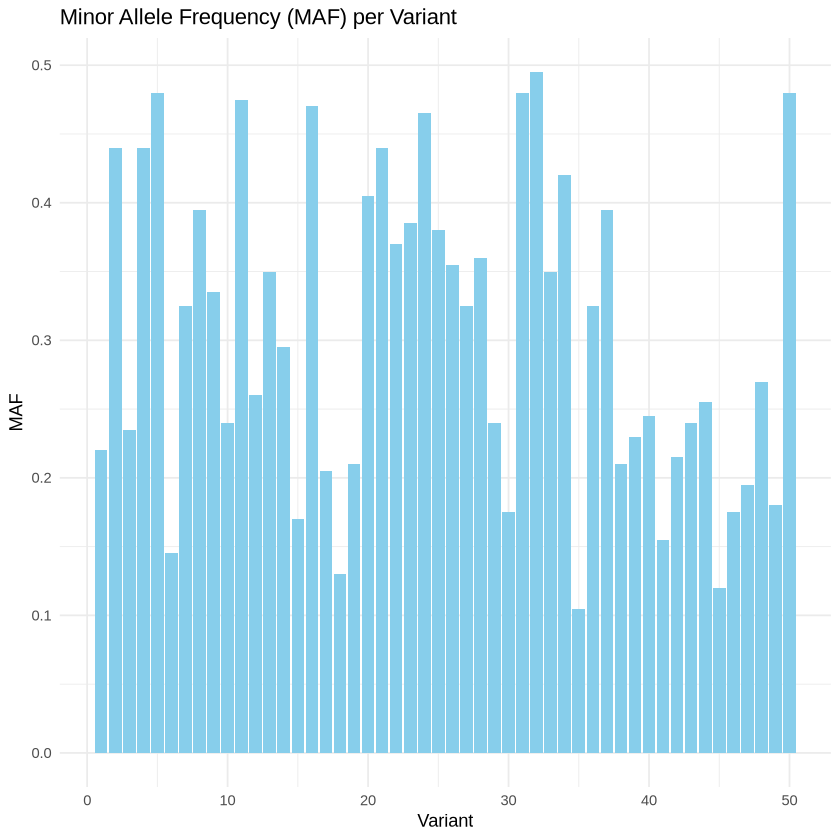

In [8]:
# 2. Calculate Minor Allele Frequency (MAF) for each variant
calculate_maf <- function(X) {
  N <- nrow(X)
  M <- ncol(X)
  
  maf <- numeric(M)
  for (j in 1:M) {
    p_j <- sum(X[, j]) / (2 * N)  # Frequency of reference allele (coded as 1)
    maf[j] <- min(p_j, 1 - p_j)   # MAF is the minimum of p_j and 1-p_j
  }
  return(maf)
}

maf_values <- calculate_maf(X)
maf_values


# MAF Plot
maf_df <- data.frame(Variant = 1:M, MAF = maf_values)
ggplot(maf_df, aes(x = Variant, y = MAF)) + 
  geom_bar(stat = "identity", fill = "skyblue") + 
  theme_minimal() + 
  labs(title = "Minor Allele Frequency (MAF) per Variant", x = "Variant", y = "MAF")


[1] 3.522721e-07 9.472897e-20 1.602148e-07 4.461524e-16 1.437375e-16
 [6] 1.980548e-05 5.763532e-12 3.215199e-14 6.501091e-13 7.922757e-09
[11] 7.323715e-21 1.902635e-08 1.563887e-15 3.356400e-10 3.817522e-05
[16] 3.205289e-15 7.324502e-07 1.865443e-04 1.073849e-06 1.208964e-13
[21] 4.225972e-15 3.394591e-13 3.195330e-11 1.286113e-17 2.009708e-13
[26] 3.641563e-14 3.423855e-09 9.549298e-15 3.907703e-10 6.963072e-06
[31] 1.389423e-15 3.926820e-22 2.301641e-11 1.767808e-14 6.843598e-04
[36] 2.942367e-11 1.368097e-10 4.111790e-07 1.052390e-07 2.897933e-07
[41] 4.497517e-05 6.933087e-08 2.245770e-07 1.188832e-08 7.079529e-05
[46] 8.027626e-07 8.128074e-07 1.244073e-09 4.182734e-06 5.489530e-14

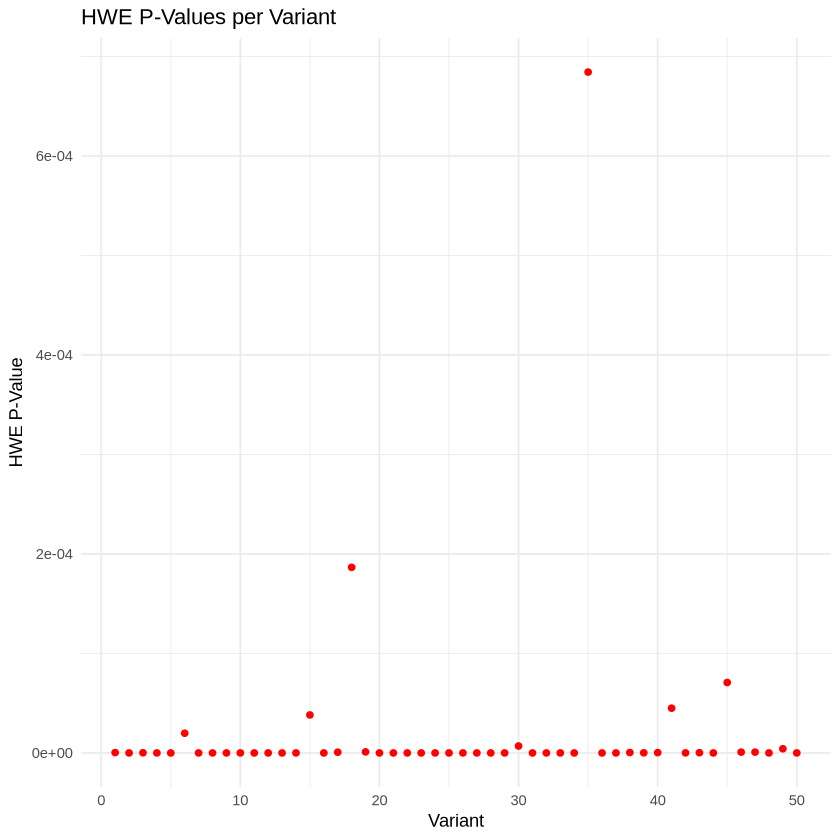

In [9]:
# 3. Calculate Hardy-Weinberg Equilibrium (HWE) p-value for each variant
calculate_hwe <- function(X) {
  N <- nrow(X)
  M <- ncol(X)
  
  p_values <- numeric(M)
  for (j in 1:M) {
    # Genotype counts
    count_0 <- sum(X[, j] == 0)
    count_1 <- sum(X[, j] == 1)
    count_2 <- sum(X[, j] == 2)
    
    # Allele frequencies
    p <- (2 * count_1 + 2 * count_2) / (2 * N)  # frequency of the reference allele
    q <- 1 - p  # frequency of the minor allele
    
    # Expected genotype frequencies under HWE
    expected_0 <- (q^2) * N
    expected_1 <- 2 * p * q * N
    expected_2 <- (p^2) * N
    
    # Chi-square test for HWE
    observed <- c(count_0, count_1, count_2)
    expected <- c(expected_0, expected_1, expected_2)
    chisq_test <- sum((observed - expected)^2 / expected)
    p_values[j] <- pchisq(chisq_test, df = 1, lower.tail = FALSE)
  }
  return(p_values)
}

hwe_p_values <- calculate_hwe(X)
hwe_p_values


# HWE Plot
hwe_df <- data.frame(Variant = 1:M, HWE_PValue = hwe_p_values)
ggplot(hwe_df, aes(x = Variant, y = HWE_PValue)) + 
  geom_point(color = "red") + 
  theme_minimal() + 
  labs(title = "HWE P-Values per Variant", x = "Variant", y = "HWE P-Value")


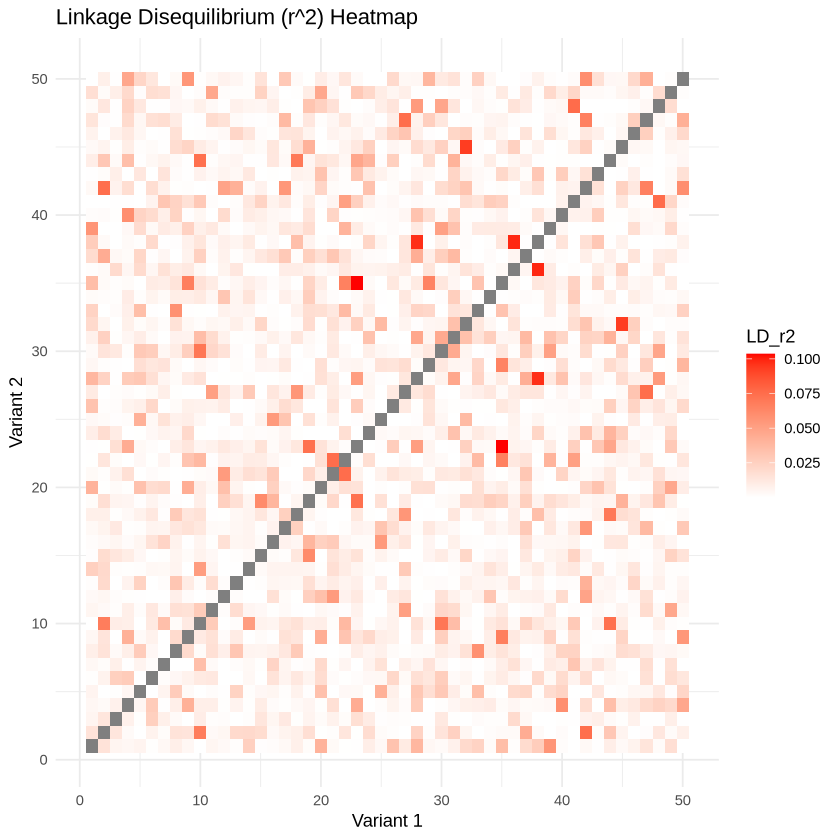

In [11]:

# 4. Calculate Linkage Disequilibrium (LD) between pairs of variants
calculate_ld <- function(X) {
  M <- ncol(X)
  ld_matrix <- matrix(NA, nrow = M, ncol = M)
  
  for (j in 1:M) {
    for (k in 1:M) {
      if (j != k) {
        r_jk <- cor(X[, j], X[, k])  # Calculate r (correlation)
        ld_matrix[j, k] <- r_jk^2    # Store r^2 (Linkage Disequilibrium)
      }
    }
  }
  return(ld_matrix)
}

ld_matrix <- calculate_ld(X)



# LD Heatmap
library(ggplot2)
library(reshape2)
ld_melted <- melt(ld_matrix)
colnames(ld_melted) <- c("Variant1", "Variant2", "LD_r2")
ggplot(ld_melted, aes(x = Variant1, y = Variant2, fill = LD_r2)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red") +
  theme_minimal() +
  labs(title = "Linkage Disequilibrium (r^2) Heatmap", x = "Variant 1", y = "Variant 2")


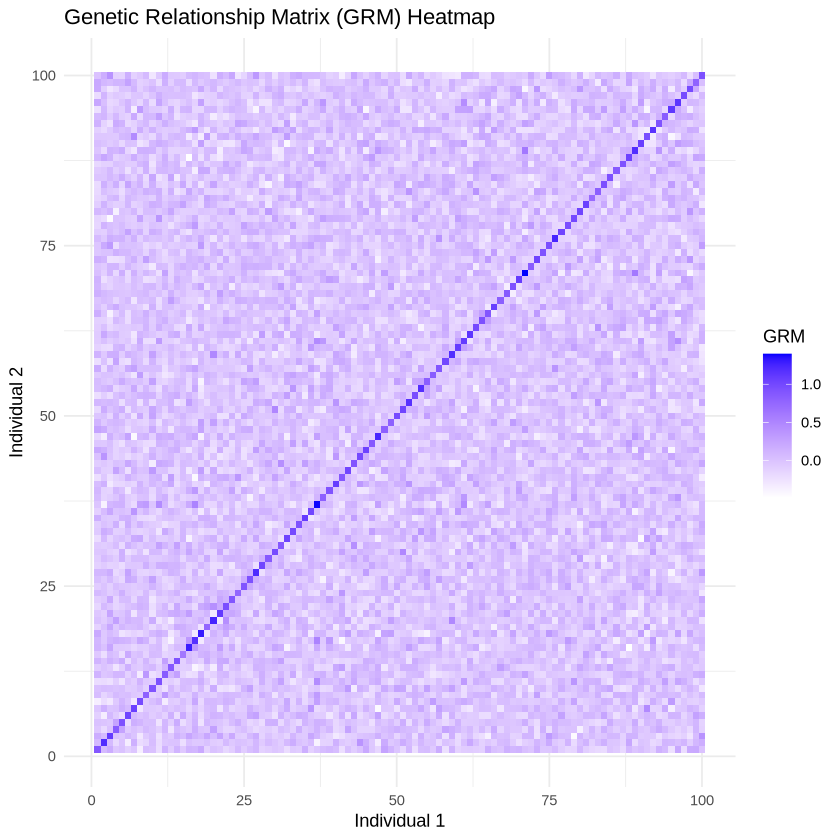

In [12]:
# 5. Calculate Genetic Relationship Matrix (GRM)
calculate_grm <- function(X) {
  N <- nrow(X)
  M <- ncol(X)
  
  grm_matrix <- matrix(NA, nrow = N, ncol = N)
  
  # Standardize genotypes by subtracting the mean and dividing by the standard deviation
  X_standardized <- scale(X, center = TRUE, scale = TRUE)
  
  for (i in 1:N) {
    for (j in 1:N) {
      grm_matrix[i, j] <- sum(X_standardized[i, ] * X_standardized[j, ]) / M  # GRM calculation
    }
  }
  
  return(grm_matrix)
}

grm_matrix <- calculate_grm(X)

# GRM Heatmap
grm_melted <- melt(grm_matrix)
colnames(grm_melted) <- c("Individual1", "Individual2", "GRM")
ggplot(grm_melted, aes(x = Individual1, y = Individual2, fill = GRM)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  theme_minimal() +
  labs(title = "Genetic Relationship Matrix (GRM) Heatmap", x = "Individual 1", y = "Individual 2")